In [1]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Step1. 下載資料

In [3]:
iris=datasets.load_iris()
X=iris.data
y=iris.target

## Step2. 區分訓練集與測試集

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

## Step3. 建模
### n_neighbors : K
### weights: 'uniform' / 'distance' / 其他
### algorithm: 'auto' / 'brute' / 'kd_tree' / 'ball_tree'
### p: 1→曼哈頓距離 / 2→歐基里德距離 / 其他: 明氏距離

In [7]:
clf=KNeighborsClassifier(n_neighbors=3,p=2,weights='distance',algorithm='brute')
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=3, weights='distance')

## Step4. 預測

In [9]:
clf.predict(X_test)

array([0, 2, 2, 0, 2, 2, 1, 2, 0, 1, 0, 0, 0, 2, 2, 1, 2, 0, 2, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2,
       0])

## Step5. 準確程度評估

In [11]:
clf.score(X_test,y_test)

0.9777777777777777

In [12]:
clf.score(X_train,y_train)

1.0

## Step6. 尋找合適的K
透過最原始的方式，把前述的所有步驟針對不同的K值都進行一次，<br>
用繪圖的方式看到合適K值的範圍。並回到資料準備的部分透過不斷的隨機切割樣本，測試K值得穩定度。

In [14]:
len(X_train)

105

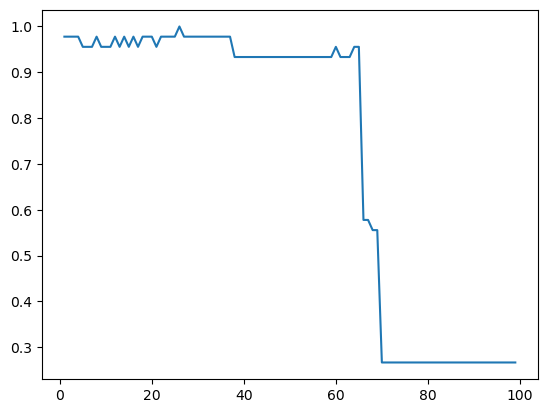

In [15]:
accuracy = []

for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train)                 
    y_pred = knn.predict(X_test)              
    accuracy.append(metrics.accuracy_score(y_test, y_pred)) 

k_range = range(1,100)
plt.plot(k_range, accuracy)
plt.show()